In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt

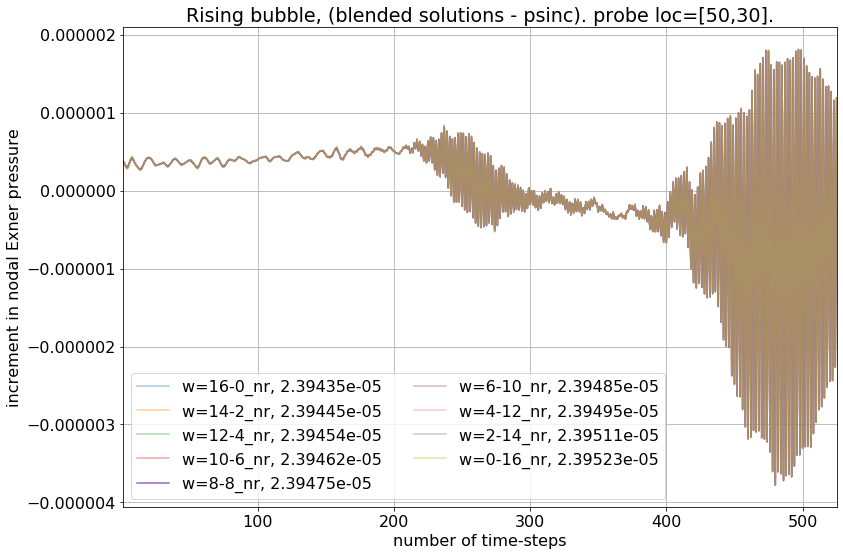

In [18]:
base_fn = "output_rising_bubble"
py_directory = "../%s/" %base_fn

Nx = 100
Ny = 50
et = 10.0

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

steps = np.arange(526)
steps = steps[1:]
# steps = steps[130:151]
# steps = steps[-20:]
probe_loc = [50,30]
comp = []
psinc = []
cb1, cb2 = [], []
attribute = 'p2_nodes'

diff = False

def get_cbs(cbs,cbs_suffix):
    cbs_suffix = '%s' %(cbs_suffix)
    cb_suffix = tc.cb_suffix(cbs[0],cbs[1],cbs_suffix)
    return [(tc.get_time_series(steps,1,attribute,cb_suffix,probe_loc,label_type='STEP',diff=diff))]

comp.append(tc.get_time_series(steps,1,attribute,'comp_debug', probe_loc,label_type='STEP',diff=diff))
psinc.append(tc.get_time_series(steps,1,attribute,'psinc_debug_nr', probe_loc,label_type='STEP',diff=diff))

p_ref = 1e5
comp = comp[0]
psinc = psinc[0]
comp -= comp.mean()
psinc -= psinc.mean()

steps_axs = steps[1:] if diff == True else steps
fig = plt.figure(figsize=(12,8))

# plt.plot(steps_axs,psinc, '-', label='psinc')
# blurp = 0.5*(psinc[1:]+psinc[:-1])
# plt.plot(steps_axs[:-1],0.5*(psinc[1:]+psinc[:-1]), '-o', label='psinc averaged')
# plt.plot(steps_axs[:-1],blurp, '-o', label='psinc averaged')
# plt.plot(steps_axs,comp, '-o', label='comp')

print_norm = True

for i,w in enumerate(range(0,17,2)):
    cbs, cbs_suffix = [1,0], 'w=%i-%i_nr' %(16-w,w)
    cb = get_cbs(cbs,cbs_suffix)[0]
    
    cb -= cb.mean()
    
    norm = np.linalg.norm(cb-psinc)
    ps = '-' if w==0 else '-'
    
    
    
    alpha = 1.0 if w == 8 else 0.4
    if print_norm == True:
        plt.plot(steps_axs, cb-psinc, ps, label='%s, %.5e' %(cbs_suffix,norm),alpha=alpha)
    else:
        plt.plot(steps_axs, cb-psinc, ps, label='%s' %(cbs_suffix),alpha=alpha)
#     plt.plot(steps_axs, cb-psinc, '-', label='%s' %(cbs_suffix),alpha=alpha)

fontsize=16
plt.rcParams.update({'font.size': fontsize})

plt.grid()
plt.legend(ncol=2)
plt.xlim([steps_axs[0],steps_axs[-1]])
# plt.ylim([0.0,0.1])
plt.xlabel("number of time-steps")
plt.ylabel("increment in nodal Exner pressure")
plt.title("Rising bubble, (blended solutions - psinc). probe loc=[%i,%i]." %(probe_loc[0],probe_loc[1]))

plt.tight_layout()
# plt.savefig("RBVS_optimal_weights_last_50.pdf")
# plt.savefig("RBVS_optimal_weights_full.pdf")
plt.show()